In [247]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

import seaborn as sns

In [248]:
# https://www.kaggle.com/datasets/katerynameleshenko/cyber-security-indexes
df = pd.read_csv('./Cyber_security.csv')

In [249]:
df.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
3,Andorra,Europe,NaN,26.38,NaN,NaN
4,Angola,Africa,NaN,12.99,9.09,22.69


In [250]:
print(df.dtypes)

Country     object
Region      object
CEI        float64
GCI        float64
NCSI       float64
DDL        float64
dtype: object


In [251]:
df.dropna(inplace=True)
df.head()

,Country,Region,CEI,GCI,NCSI,DDL
0,Afghanistan,Asia-Pasific,1.000,5.20,11.69,19.50
1,Albania,Europe,0.566,64.32,62.34,48.74
2,Algeria,Africa,0.721,33.95,33.77,42.81
6,Argentina,South America,0.514,50.12,63.64,60.43
7,Armenia,Europe,0.655,50.47,35.06,55.06


In [252]:
df = df.drop(columns=['Country', 'Region'])

In [253]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

In [254]:
k_values = range(1, 11)
Error = []

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_scaled)
    Error.append(kmeans.inertia_)

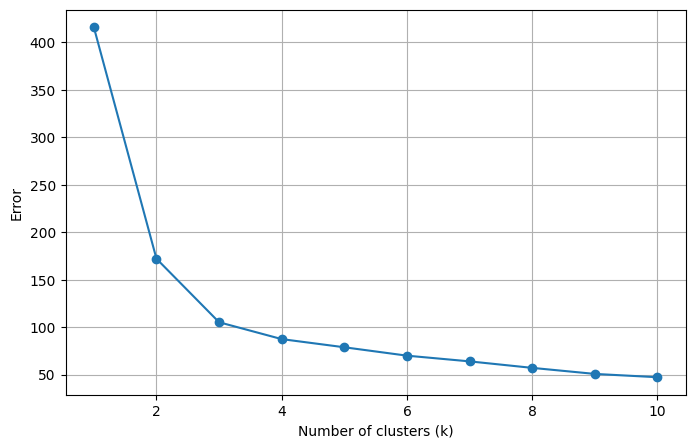

In [255]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Error')
plt.grid()
plt.show()


In [256]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=17)
kmeans.fit(df_scaled)

KMeans(n_clusters=3, random_state=17)

In [257]:
centers = kmeans.cluster_centers_
labels = kmeans.labels_

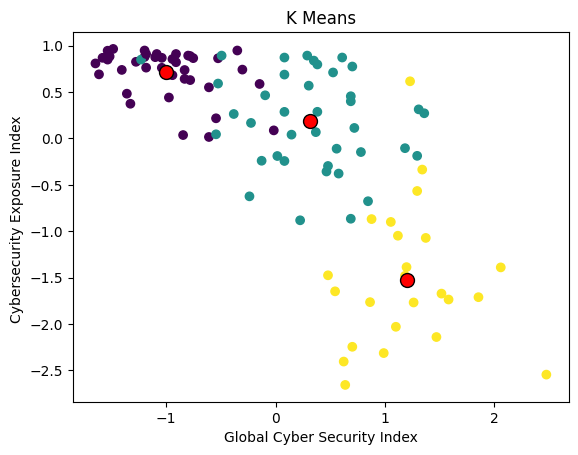

In [258]:
f, ax = plt.subplots(1)
ax.set_title('K Means')
ax.scatter(df_scaled[:,0],df_scaled[:,1],c=labels)
plt.ylabel('Cybersecurity Exposure Index ')
plt.xlabel('Global Cyber Security Index')
ax.scatter(centers[:, 0], centers[:, 1], marker='o', color = 'red', s = 100, edgecolor='black')

## PCA

In [259]:
pca = PCA()
reduced_data = pca.fit_transform(df_scaled)

In [260]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum = np.cumsum(exp_var_pca)
print(cum_sum)

[0.81210556 0.90906209 0.97466903 1.        ]


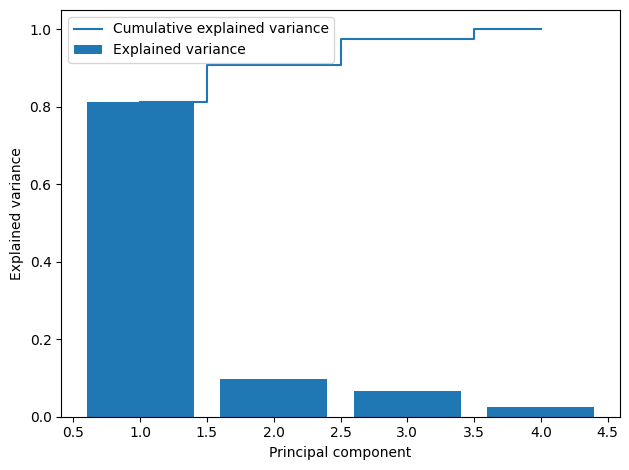

In [261]:
plt.bar(range(1,len(exp_var_pca)+1), exp_var_pca, align='center', label='Explained variance')
plt.step(range(1,len(cum_sum)+1), cum_sum, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

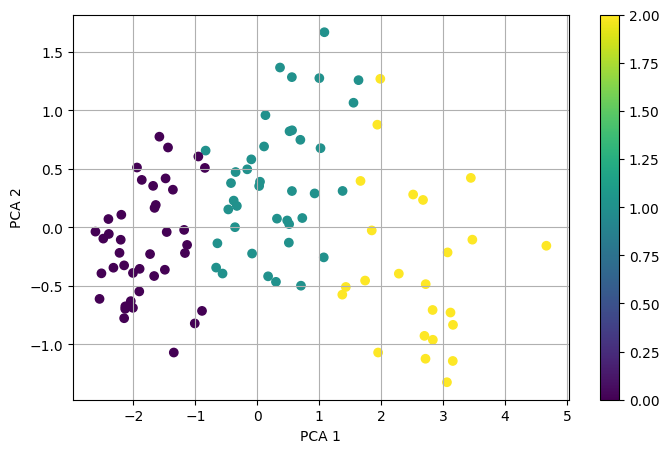

In [262]:
plt.figure(figsize=(8, 5))
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=kmeans.labels_, cmap='viridis', marker='o')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.grid()
plt.show()

